In [1]:
# Import necessary built in libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo

In [2]:
# Load dataset into dataframe
path = r"weather.csv"
df = pd.read_csv(path, skiprows=9) # skip first 8 rows
df.head(n=15)

,timestamp,Basel Temperature [2 m elevation corrected],Basel Growing Degree Days [2 m elevation corrected],Basel Temperature [1000 mb],Basel Temperature [850 mb],Basel Temperature [700 mb],Basel Sunshine Duration,Basel Shortwave Radiation,Basel Direct Shortwave Radiation,Basel Diffuse Shortwave Radiation,...,Basel Wind Direction [80 m],Basel Wind Gust,Basel Wind Speed [900 mb],Basel Wind Direction [900 mb],Basel Wind Speed [850 mb],Basel Wind Direction [850 mb],Basel Wind Speed [700 mb],Basel Wind Direction [700 mb],Basel Wind Speed [500 mb],Basel Wind Direction [500 mb]
0,20180101T0000,10.960529,0.040022,12.87,3.29,-7.00,0.000000,0.00000,0.000000,0.000000,...,238.86102,41.760002,86.460724,249.52771,83.647920,255.54510,80.385670,239.30028,127.970245,231.96951
1,20180101T0100,10.500529,0.020855,12.06,1.47,-7.92,0.000000,0.00000,0.000000,0.000000,...,241.51782,42.839996,74.801200,252.34988,79.227810,257.66885,83.815070,240.68246,134.885220,231.93726
2,20180101T0200,9.790529,0.000000,11.33,1.05,-8.85,0.000000,0.00000,0.000000,0.000000,...,247.55725,39.960000,74.230740,257.10953,76.721390,268.11774,76.689290,257.52954,141.120450,232.98395
3,20180101T0300,8.970529,0.000000,10.50,0.33,-9.21,0.000000,0.00000,0.000000,0.000000,...,255.14139,43.560000,75.734450,263.44928,72.488840,273.41660,71.891914,262.51910,132.296940,231.85153
4,20180101T0400,8.690529,0.000000,9.97,0.33,-10.20,0.000000,0.00000,0.000000,0.000000,...,259.16992,46.800000,75.004500,266.69812,75.151240,277.43140,75.767815,266.18590,118.383080,224.13754
5,20180101T0500,7.960528,0.000000,9.15,-0.74,-10.20,0.000000,0.00000,0.000000,0.000000,...,257.58255,45.000000,74.661606,263.35474,74.690240,273.86920,76.997930,260.58173,100.243675,228.63986
6,20180101T0600,7.360529,0.000000,8.52,-1.11,-10.70,0.000000,0.00000,0.000000,0.000000,...,255.69974,43.560000,73.469986,264.09387,73.792090,275.59933,69.488390,270.89053,93.545980,242.74467
7,20180101T0700,6.810529,0.000000,8.02,-1.47,-11.14,0.000000,0.00000,0.000000,0.000000,...,253.89871,42.120000,72.037780,263.97600,71.353600,272.60257,72.728020,270.85086,80.646430,262.30396
8,20180101T0800,6.150528,0.000000,7.47,-1.76,-12.07,0.000000,0.00000,0.000000,0.000000,...,249.17145,41.399998,73.150020,263.78436,70.233215,271.76240,70.355830,273.81410,80.570860,265.13007
9,20180101T0900,5.900528,0.000000,7.25,-1.96,-12.39,0.000000,0.00000,0.000000,0.000000,...,246.50143,41.399998,74.704120,263.08047,70.311600,273.22864,65.954710,276.58194,84.277680,268.28653


In [3]:
# View summary statistic of the dataset
print(df.describe())

       Basel Temperature [2 m elevation corrected]  \
count                                 47448.000000   
mean                                     12.654467   
std                                       7.892442   
min                                      -8.649471   
25%                                       6.520528   
50%                                      12.210529   
75%                                      18.360529   
max                                      36.330530   

       Basel Growing Degree Days [2 m elevation corrected]  \
count                                       47448.000000     
mean                                            0.194972     
std                                             0.233255     
min                                             0.000000     
25%                                             0.000000     
50%                                             0.092105     
75%                                             0.348355     
max              

In [4]:
# Display the features row and check sparsity in dataset
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47448 entries, 0 to 47447
Data columns (total 42 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   timestamp                                            47448 non-null  object 
 1   Basel Temperature [2 m elevation corrected]          47448 non-null  float64
 2   Basel Growing Degree Days [2 m elevation corrected]  47448 non-null  float64
 3   Basel Temperature [1000 mb]                          47448 non-null  float64
 4   Basel Temperature [850 mb]                           47448 non-null  float64
 5   Basel Temperature [700 mb]                           47448 non-null  float64
 6   Basel Sunshine Duration                              47448 non-null  float64
 7   Basel Shortwave Radiation                            47448 non-null  float64
 8   Basel Direct Shortwave Radiation                     47448 non-nul

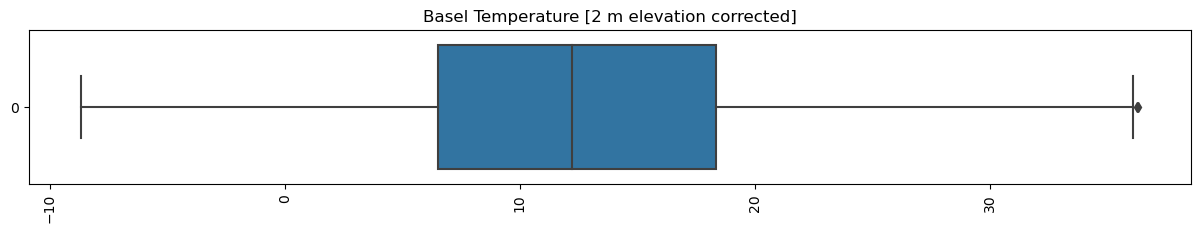

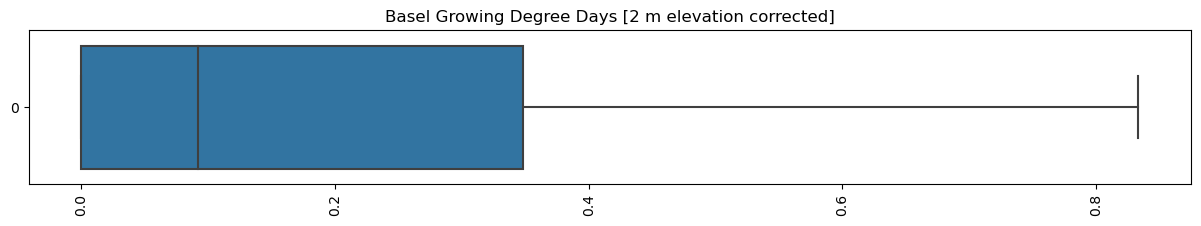

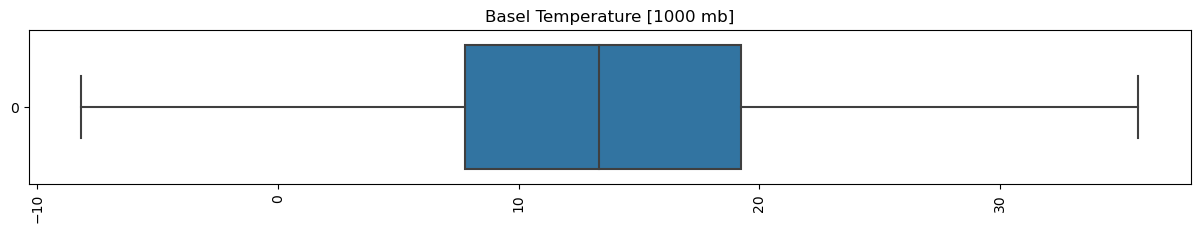

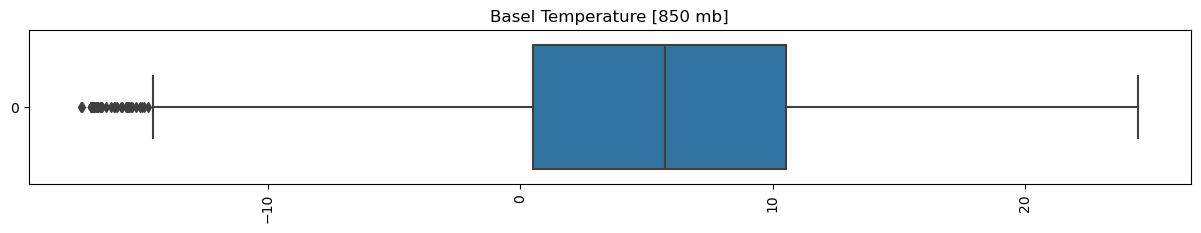

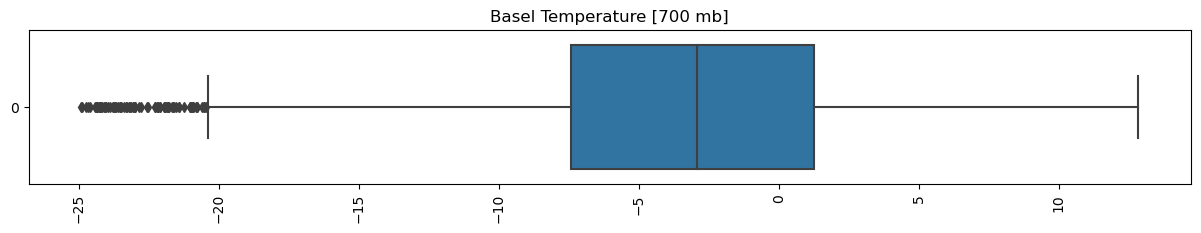

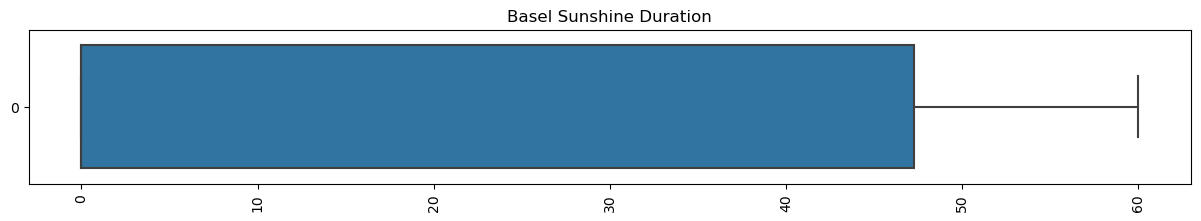

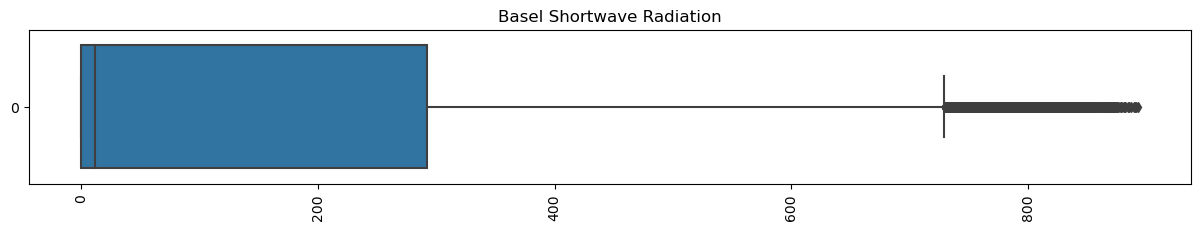

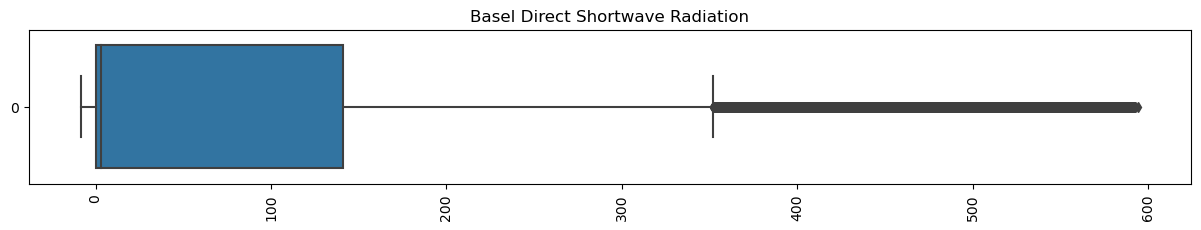

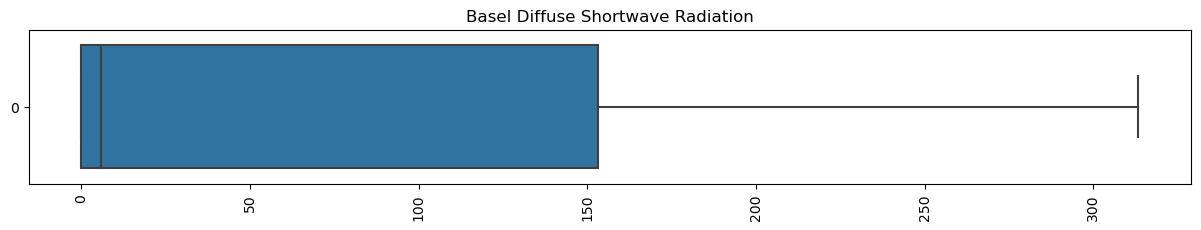

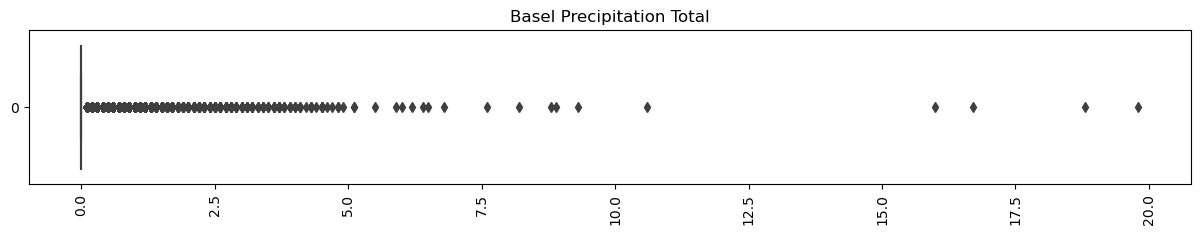

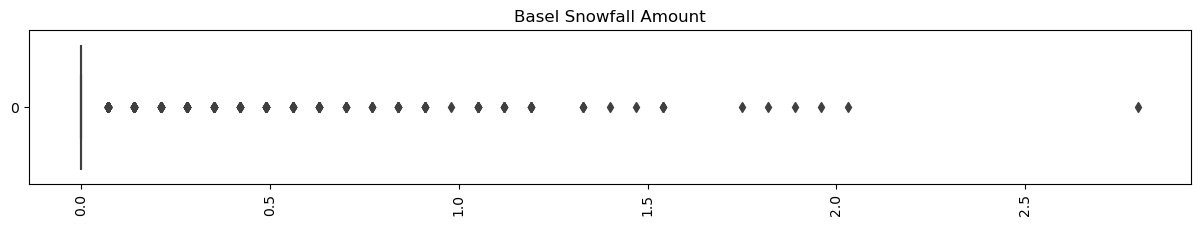

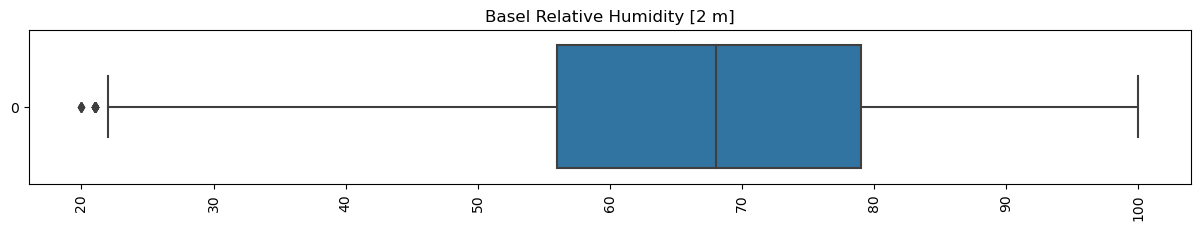

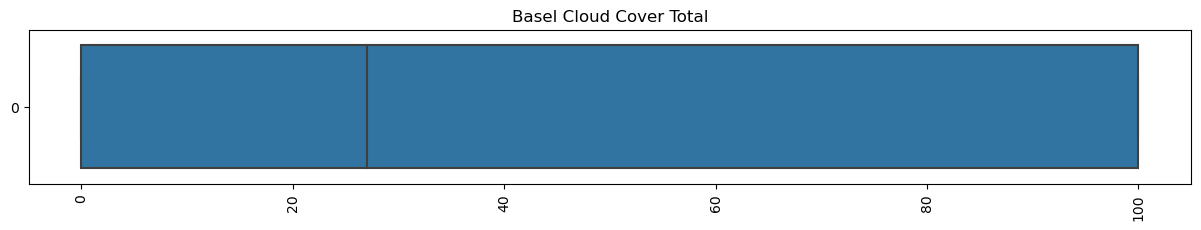

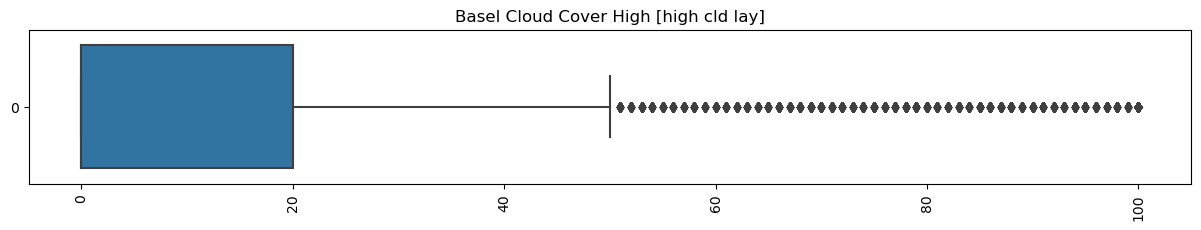

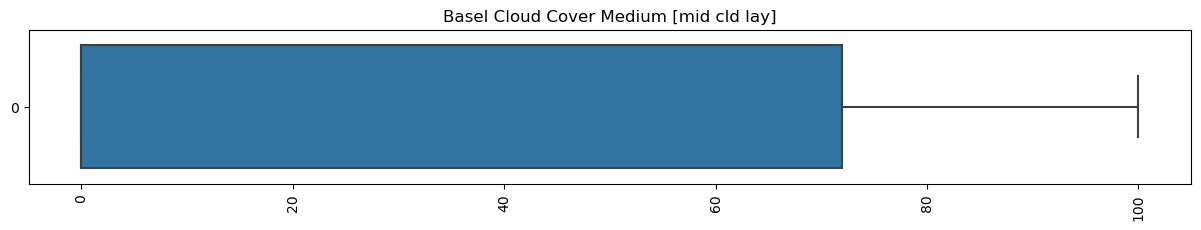

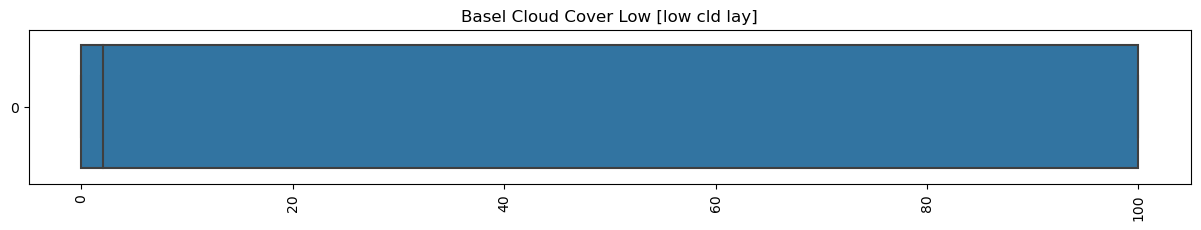

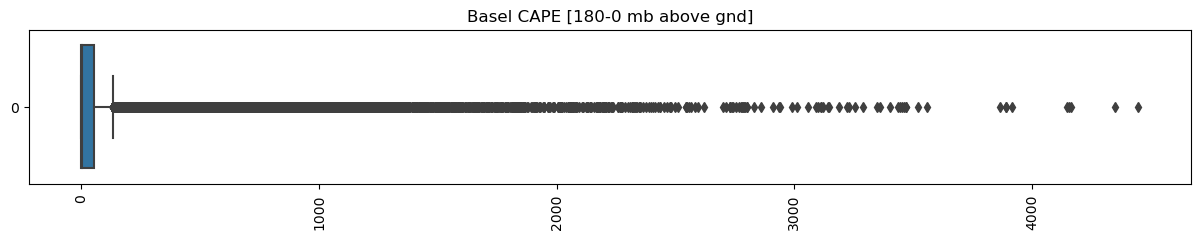

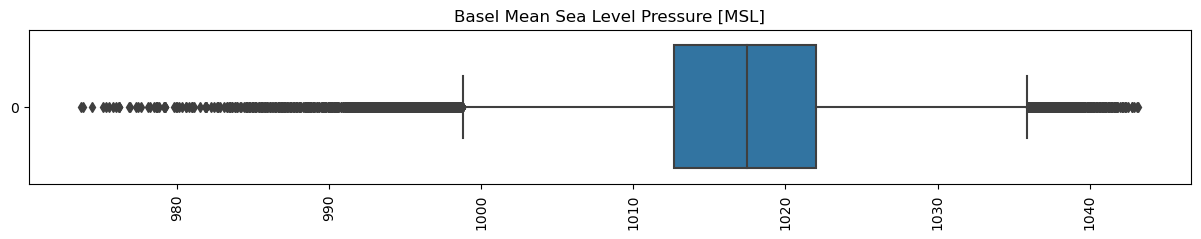

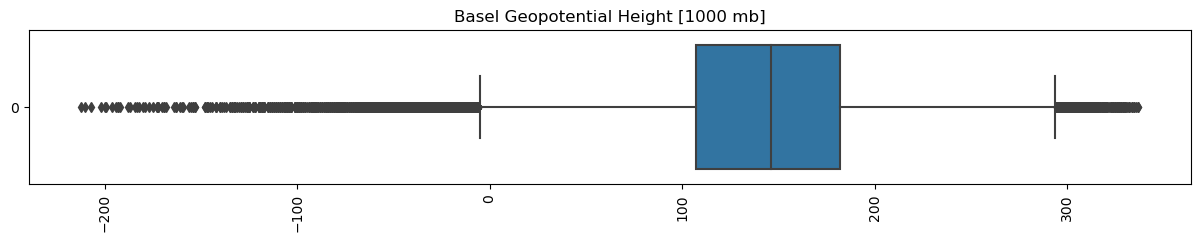

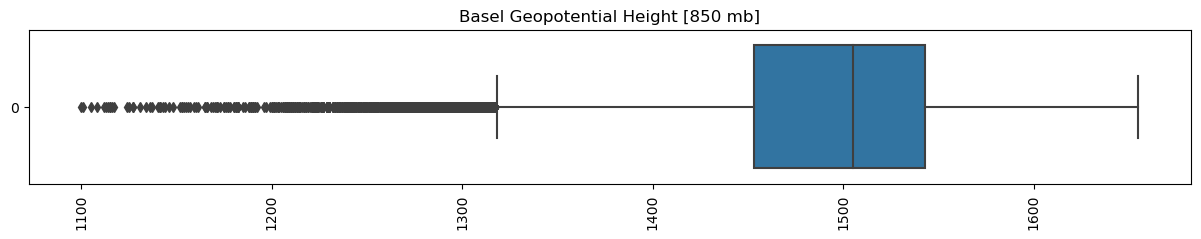

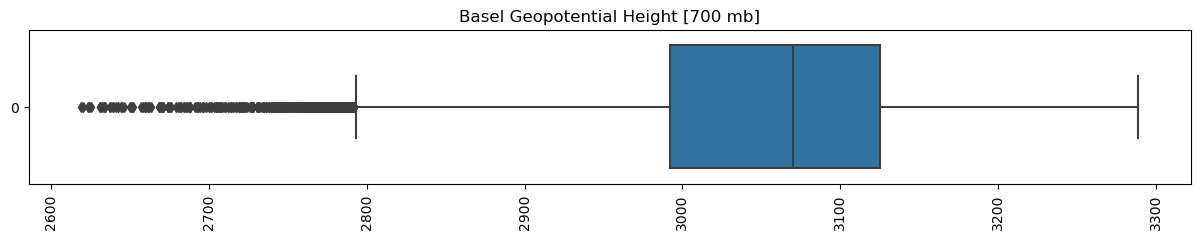

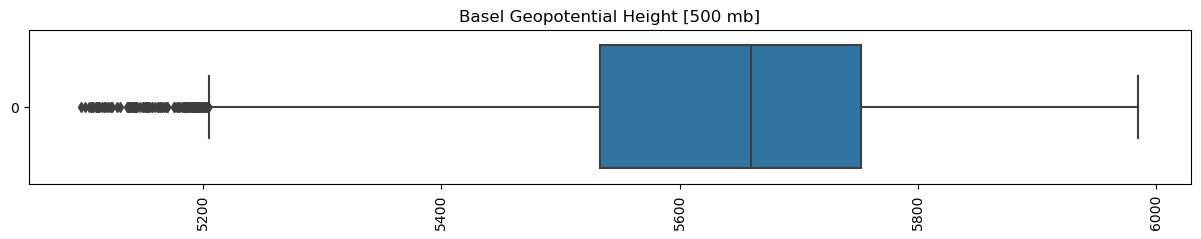

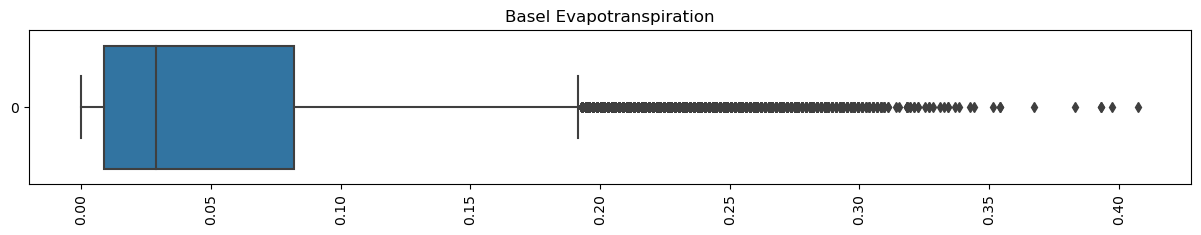

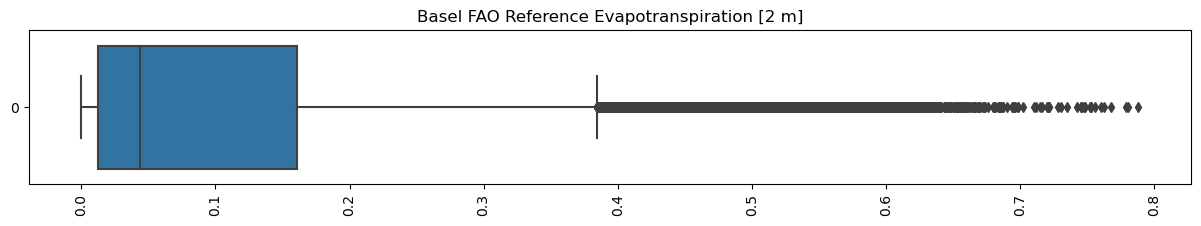

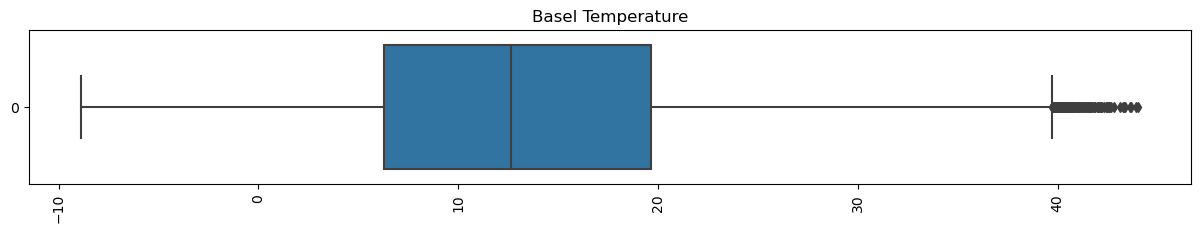

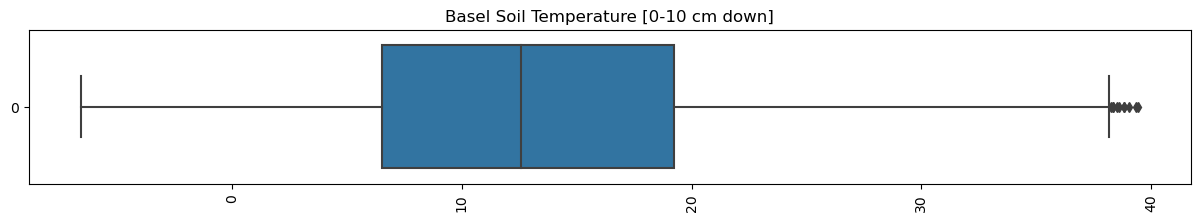

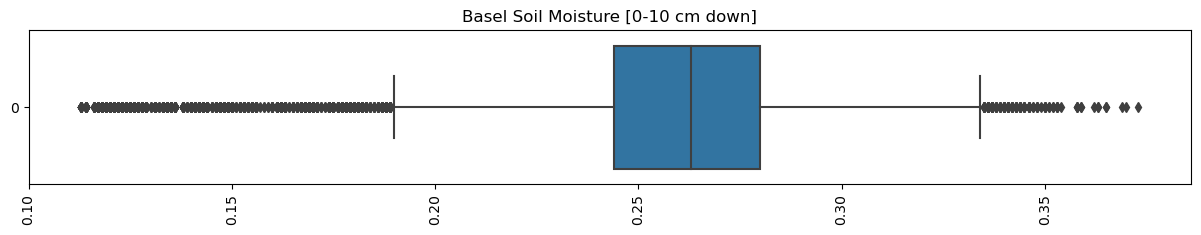

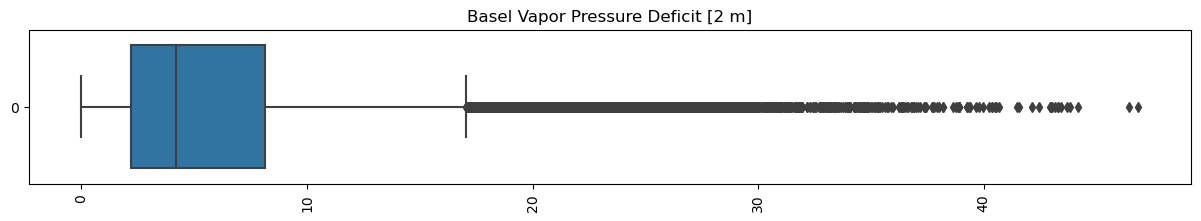

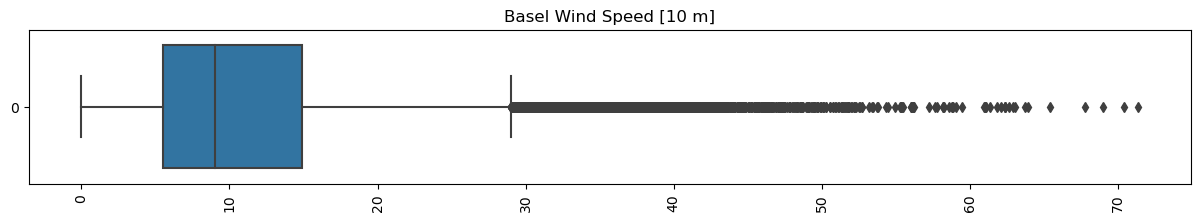

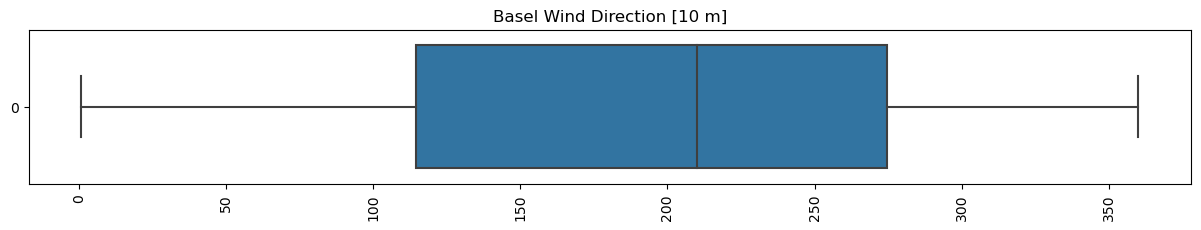

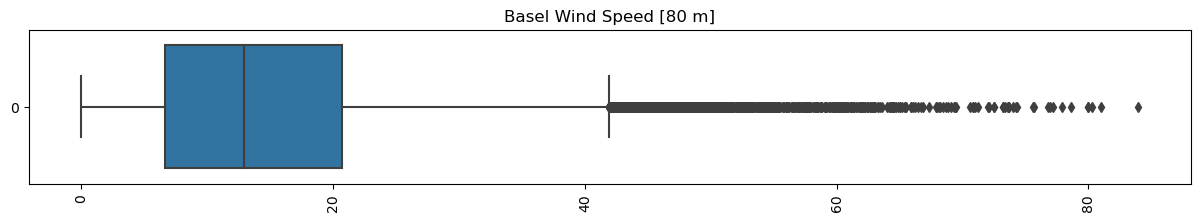

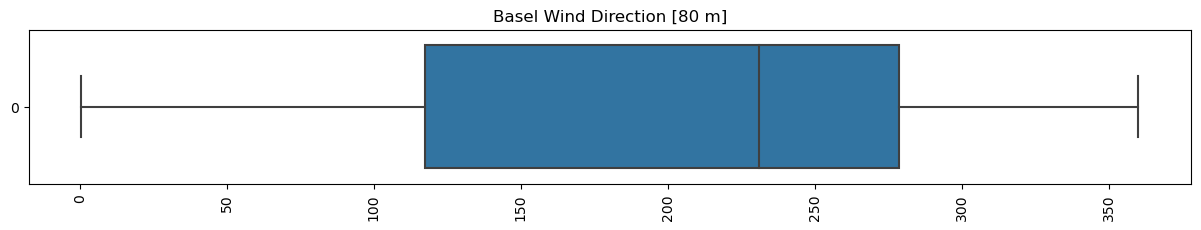

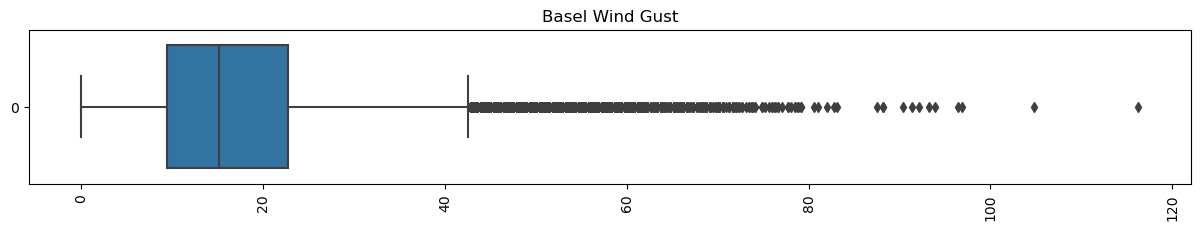

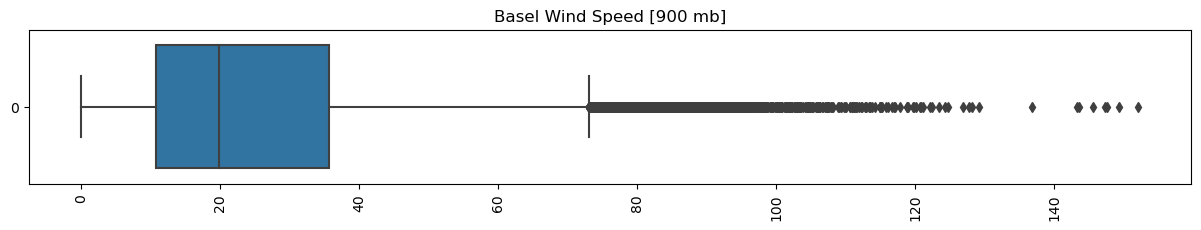

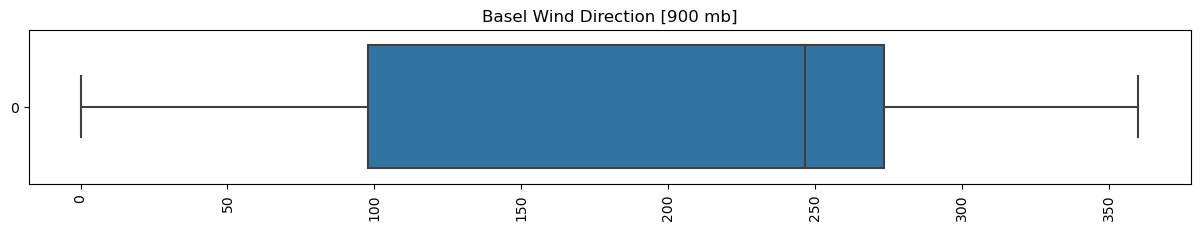

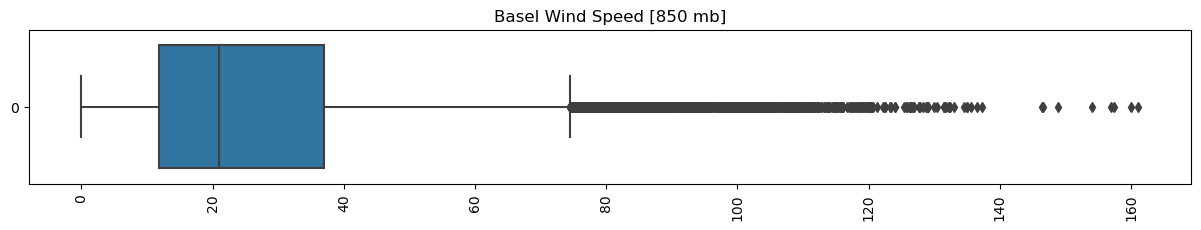

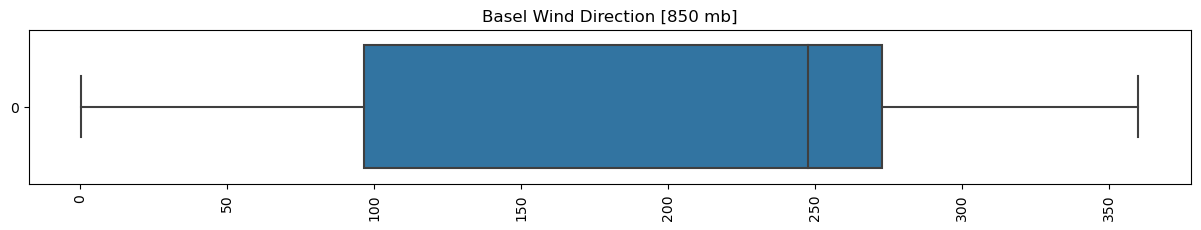

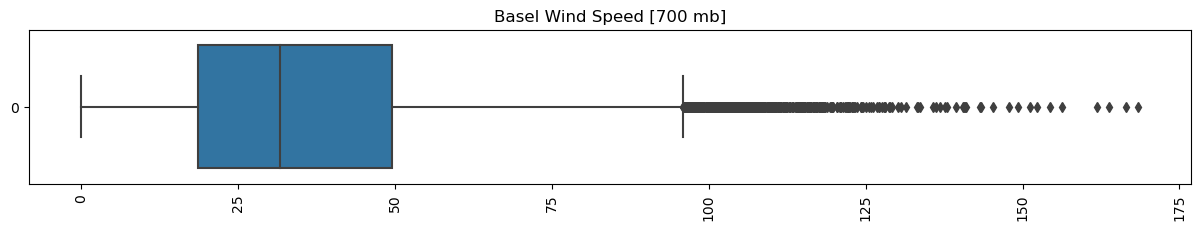

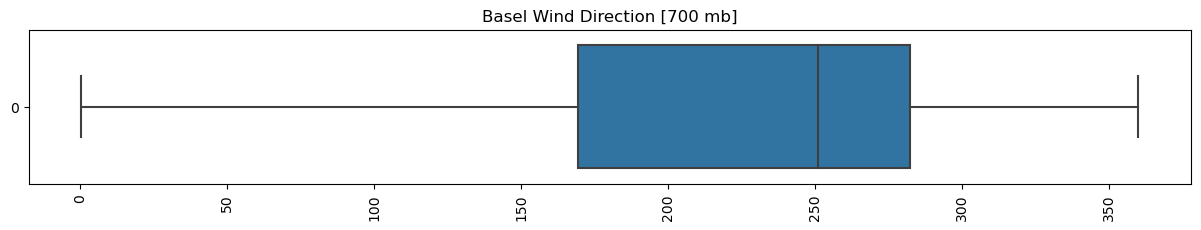

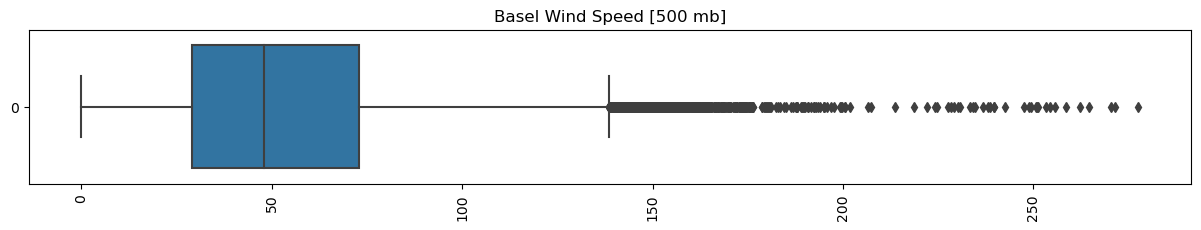

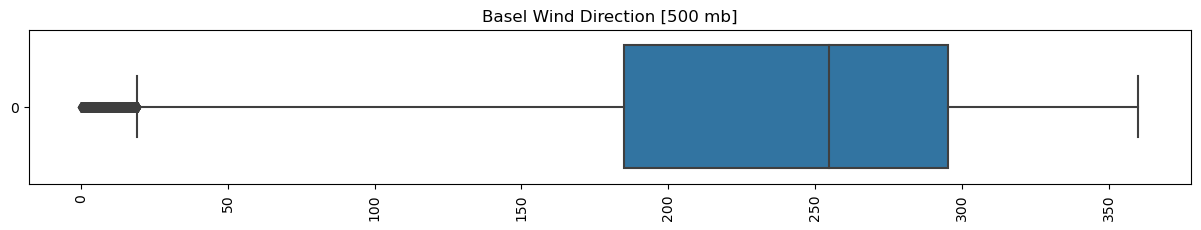

In [5]:
# Data visualization using boxplots
# Extract each column in dataframe and assign to new array for boxplots
arr = []
for i in range(1, len(df.columns)): 
    feature = df.columns[i]
    col = df[feature]
    arr = np.array(col)
    
    plt.figure(figsize=(15, 2))
    sns.boxplot(orient="h", data=arr)
    plt.title(f"{feature}")
    plt.xticks(rotation=90)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


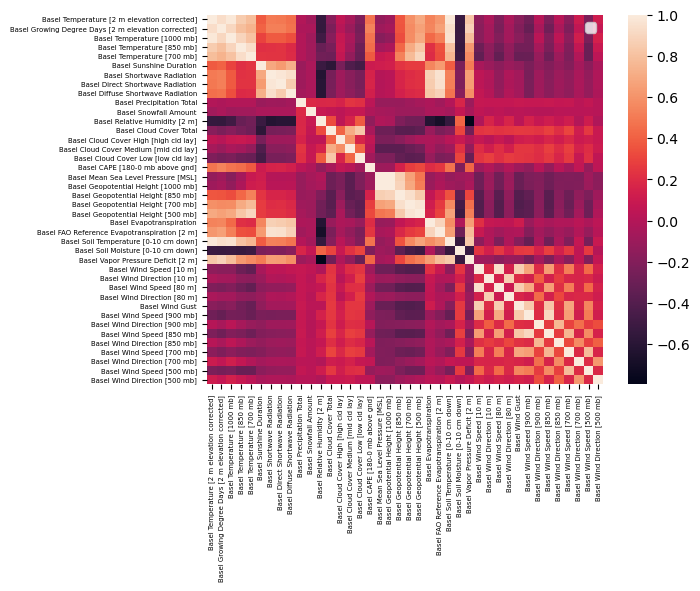

In [29]:
# Correlation analysis using heatmap
data = df.drop(["Basel Temperature", "timestamp"], axis=1)

dataplot = sns.heatmap(data.astype('float64').corr(), xticklabels=True, yticklabels=True)
dataplot.tick_params(labelsize=5)
plt.show()

In [7]:
# factor analysis

# Check the data for missing values
data.isnull().sum()

Basel Temperature [2 m elevation corrected]            0
Basel Growing Degree Days [2 m elevation corrected]    0
Basel Temperature [1000 mb]                            0
Basel Temperature [850 mb]                             0
Basel Temperature [700 mb]                             0
Basel Sunshine Duration                                0
Basel Shortwave Radiation                              0
Basel Direct Shortwave Radiation                       0
Basel Diffuse Shortwave Radiation                      0
Basel Precipitation Total                              0
Basel Snowfall Amount                                  0
Basel Relative Humidity [2 m]                          0
Basel Cloud Cover Total                                0
Basel Cloud Cover High [high cld lay]                  0
Basel Cloud Cover Medium [mid cld lay]                 0
Basel Cloud Cover Low [low cld lay]                    0
Basel CAPE [180-0 mb above gnd]                        0
Basel Mean Sea Level Pressure [

In [8]:
#normalize your data using minmaxscaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)

In [9]:
#calculate the KMO test of sampling adequacy
kmo_all, kmo_model = calculate_kmo(data_norm)
print('KMO model score:', kmo_model)

KMO model score: 0.8521007610621112


C:\Users\langk\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [10]:
#compute the correlation matrix
corr = np.corrcoef(data_norm, rowvar=False)

#print the correlation between the first 2 variables
print(corr[0,1])

#print the entire correlation matrix
print(corr)

0.9348181048337003
[[ 1.          0.9348181   0.98222665 ...  0.1029271  -0.2323202
   0.11431226]
 [ 0.9348181   1.          0.90848621 ...  0.05367156 -0.25932648
   0.07294263]
 [ 0.98222665  0.90848621  1.         ...  0.12974412 -0.2364448
   0.13788397]
 ...
 [ 0.1029271   0.05367156  0.12974412 ...  1.          0.20637112
   0.61954652]
 [-0.2323202  -0.25932648 -0.2364448  ...  0.20637112  1.
   0.18381184]
 [ 0.11431226  0.07294263  0.13788397 ...  0.61954652  0.18381184
   1.        ]]


In [11]:
#perform factor analysis
n_factors = data.shape[1]
fa = FactorAnalyzer(n_factors, rotation=None)
fa.fit(corr)

FactorAnalyzer(n_factors=40, rotation=None, rotation_kwargs={})

In [12]:
#kaiser_Guttman rule
#contains the indices where the eigenvalues of the correlation matrix
ev, v = fa.get_eigenvalues()
idx = np.where(ev > 1)[0]
#recomend number of factors to retain based on the kaiser-Guttman rule
n_factors_kg = idx.size
print(f"Number of factors (Kaiser_Guttman rule): {n_factors_kg}")

Number of factors (Kaiser_Guttman rule): 6


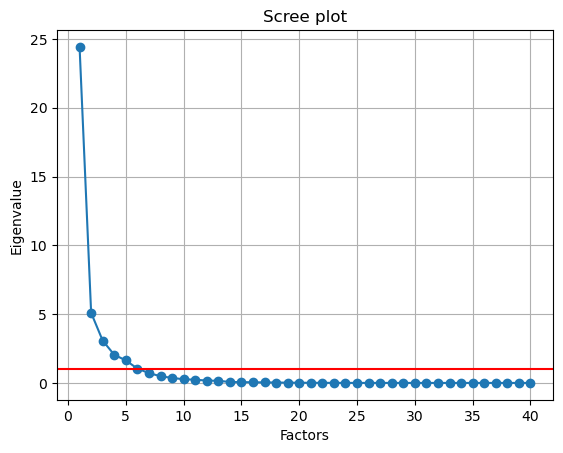

In [13]:
#scree plot
plt.plot(range(1,n_factors+1), ev, marker='o')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.axhline(y=1, color='red')
plt.grid()
plt.show()

In [14]:
# Varimax rotation
fa = FactorAnalyzer(n_factors_kg, rotation='varimax')
fa.fit(corr)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [15]:
# get the factor loadings
loadings = fa.loadings_

# print the factor loadings
df2 = df.drop(columns=["Basel Temperature [1000 mb]", "timestamp"], axis=1)
print(pd.DataFrame(fa.loadings_,index=df2.columns))

                                                           0         1  \
Basel Temperature [2 m elevation corrected]         0.531633 -0.364772   
Basel Growing Degree Days [2 m elevation correc...  0.559482 -0.379842   
Basel Temperature [850 mb]                          0.462101 -0.362643   
Basel Temperature [700 mb]                          0.294915 -0.437478   
Basel Sunshine Duration                             0.264198 -0.481261   
Basel Shortwave Radiation                           0.814695 -0.239444   
Basel Direct Shortwave Radiation                    0.922027 -0.195877   
Basel Diffuse Shortwave Radiation                   0.915665 -0.197785   
Basel Precipitation Total                           0.927463 -0.191737   
Basel Snowfall Amount                              -0.329615  0.030730   
Basel Relative Humidity [2 m]                      -0.149778 -0.014301   
Basel Cloud Cover Total                            -0.800024  0.132059   
Basel Cloud Cover High [high cld lay] 

In [16]:
#get the variance explained by each factor
var_exp = fa.get_factor_variance()

# print the variance explained by each factor
print(pd.DataFrame(var_exp,index=['Variance','Proportional Var','Cumulative Var']))

                        0         1         2         3         4         5
Variance          9.20362  8.242368  7.765776  5.145893  3.648139  2.660723
Proportional Var  0.23009  0.206059  0.194144  0.128647  0.091203  0.066518
Cumulative Var    0.23009  0.436150  0.630294  0.758941  0.850145  0.916663


In [17]:
# Extract the communalities
communalities = fa.get_communalities()
com = pd.DataFrame(communalities,index=df2.columns,columns=['Communalities'])
print(com)

# Set threshold and eliminate features with communalities lower than that
com = df2.columns[com['Communalities'] > 0.9]
print(com)

                                                    Communalities
Basel Temperature [2 m elevation corrected]              0.998610
Basel Growing Degree Days [2 m elevation correc...       0.997812
Basel Temperature [850 mb]                               0.998001
Basel Temperature [700 mb]                               0.993780
Basel Sunshine Duration                                  0.989255
Basel Shortwave Radiation                                0.969778
Basel Direct Shortwave Radiation                         0.990507
Basel Diffuse Shortwave Radiation                        0.986833
Basel Precipitation Total                                0.987894
Basel Snowfall Amount                                    0.449094
Basel Relative Humidity [2 m]                            0.241347
Basel Cloud Cover Total                                  0.954133
Basel Cloud Cover High [high cld lay]                    0.917919
Basel Cloud Cover Medium [mid cld lay]                   0.631144
Basel Clou

In [18]:
# Try Ridge Regression

# Remove rows with missing values and non-numeric cols
df.dropna(inplace=True)

# Split the DataFrame into X and y
X = df.drop(columns=["Basel Temperature [1000 mb]", "timestamp"], axis=1)
FA_X = com
y = df["Basel Temperature [1000 mb]"].values

In [19]:
# Normalize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
FAX_scaled = scaler.fit_transform(X)
y_df = pd.DataFrame(y, columns=["Basel Temperature [1000 mb]"])
y_scaled = scaler.fit_transform(y_df.values)

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(FAX_scaled, y_scaled, test_size=0.2, random_state=42)

# logarithmic range of lambda values
lambda_values = np.logspace(-5, 5, 100)

# RidgeCV object
ridge = RidgeCV(alphas=lambda_values, cv=10, scoring='neg_mean_squared_error') # Higher fold number, more variance, less bias

# Use reduced version of features(factor analyzer)
X_train, X_test, y_train, y_test = X_train2, X_test2, y_train2, y_test2

# Fit the RidgeCV object for training
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-05, 1.26185688e-05, 1.59228279e-05, 2.00923300e-05,
       2.53536449e-05, 3.19926714e-05, 4.03701726e-05, 5.09413801e-05,
       6.42807312e-05, 8.11130831e-05, 1.02353102e-04, 1.29154967e-04,
       1.62975083e-04, 2.05651231e-04, 2.59502421e-04, 3.27454916e-04,
       4.13201240e-04, 5.21400829e-04, 6.57933225e-04, 8.30217568e-04,
       1.04761575e-03, 1.32194115e-0...
       4.75081016e+02, 5.99484250e+02, 7.56463328e+02, 9.54548457e+02,
       1.20450354e+03, 1.51991108e+03, 1.91791026e+03, 2.42012826e+03,
       3.05385551e+03, 3.85352859e+03, 4.86260158e+03, 6.13590727e+03,
       7.74263683e+03, 9.77009957e+03, 1.23284674e+04, 1.55567614e+04,
       1.96304065e+04, 2.47707636e+04, 3.12571585e+04, 3.94420606e+04,
       4.97702356e+04, 6.28029144e+04, 7.92482898e+04, 1.00000000e+05]),
        cv=10, scoring='neg_mean_squared_error')

In [20]:
# Optimal lambda value
print("Optimal lambda:", ridge.alpha_)

Optimal lambda: 0.010722672220103232


In [21]:
# Fit a Ridge Regression model with the optimal lambda value
ridge_optimal = Ridge(alpha=ridge.alpha_)
ridge_optimal.fit(X_train, y_train)

Ridge(alpha=0.010722672220103232)

In [22]:
# Make predictions on the test set
y_pred = ridge_optimal.predict(X_test)

# Compute performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

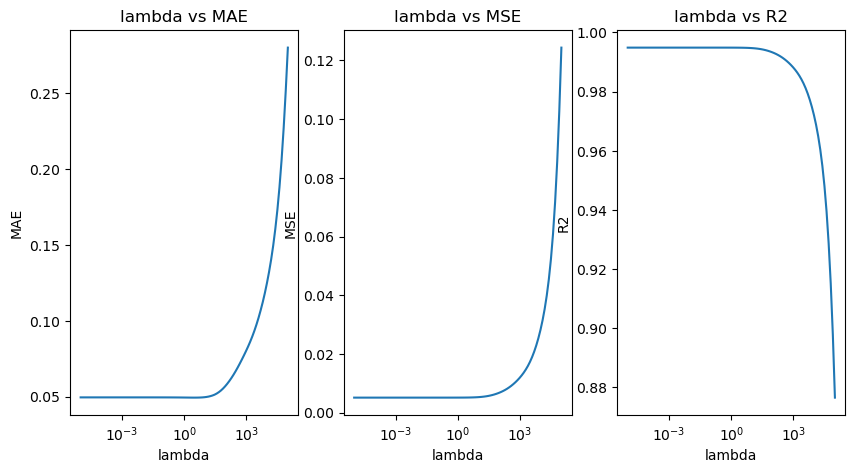

In [23]:
# Record the corresponding lambda vs performance metrics value 
mae_list = []
mse_list = []
r2_list = []

# Perform regression for each lambda value and record
for lamda in lambda_values:
    ridge = Ridge(alpha=lamda)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

# Plot lambda_values vs Performance metrics
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(lambda_values, mae_list)
plt.xlabel('lambda')
plt.ylabel('MAE')
plt.xscale('log')
plt.title('lambda vs MAE')

plt.subplot(1, 3, 2)
plt.plot(lambda_values, mse_list)
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.xscale('log')
plt.title('lambda vs MSE')

plt.subplot(1, 3, 3)
plt.plot(lambda_values, r2_list)
plt.xlabel('lambda')
plt.ylabel('R2')
plt.xscale('log')
plt.title('lambda vs R2')

plt.show()

In [24]:
# Print performance metrics
print("Mean absolute error:", mae)
print("Mean squared error:", mse)
print("R^2 score:", r2)

# Prediction accuracy
accuracy = ridge.score(X_test, y_test)
print(f'Ridge Regression Accuracy: {accuracy:.3f}')

Mean absolute error: 0.28005567361023503
Mean squared error: 0.12434737325507611
R^2 score: 0.8765649737291138
Ridge Regression Accuracy: 0.877
